<a href="https://colab.research.google.com/github/iamamofa/Pypi-Projects/blob/main/dr_seyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load the Data

In [ ]:
#install packages
!pip install scipy

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Mock data creation
np.random.seed(0)
data = {
    'Age': np.random.choice(['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '>65'], size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Religion': np.random.choice(['Christianity', 'Islam', 'Traditional', 'Other'], size=100),
    'Ethnicity': np.random.choice(['Akan', 'Ewe', 'Ga-Adangbe', 'Mole-Dagbon', 'Other'], size=100),
    'Marital Status': np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], size=100),
    'Education': np.random.choice(['None', 'Primary', 'Secondary', 'Tertiary'], size=100),
    'Occupation': np.random.choice(['Unemployed', 'Student', 'Farmer', 'Trader', 'Other'], size=100),
    'Household Type': np.random.choice(['Urban', 'Rural'], size=100),
    'Residence Classification': np.random.choice(['Urban', 'Rural'], size=100),
    'Country of Birth': np.random.choice(['Ghana', 'Nigeria', 'Other'], size=100),
    'Nationality': np.random.choice(['Ghanaian', 'Non-Ghanaian'], size=100),
    'Sub-lineage': np.random.choice(['L2', 'L3', 'L4', 'L5', 'L6', 'L8'], size=100),
    'Cough Duration': np.random.choice(['Yes', 'No'], size=100),
    'Cough with Blood': np.random.choice(['Yes', 'No'], size=100),
    'Fever': np.random.choice(['Yes', 'No'], size=100),
    'Weight Loss': np.random.choice(['Yes', 'No'], size=100),
    'Night Sweats': np.random.choice(['Yes', 'No'], size=100),
    'Swollen Glands': np.random.choice(['Yes', 'No'], size=100),
    'Shortness of Breath': np.random.choice(['Yes', 'No'], size=100),
    'Chest Pain': np.random.choice(['Yes', 'No'], size=100),
    'Fatigue': np.random.choice(['Yes', 'No'], size=100),
    'Recurring Chills': np.random.choice(['Yes', 'No'], size=100),
    'Loss of Appetite': np.random.choice(['Yes', 'No'], size=100),
    'HIV': np.random.choice(['Positive', 'Negative'], size=100),
    'Diabetes Mellitus': np.random.choice(['Positive', 'Negative'], size=100),
    'Malnutrition': np.random.choice(['Yes', 'No'], size=100),
    'Treatment Outcome': np.random.choice(['Success', 'Failure', 'Death', 'Lost to Follow-up'], size=100),
    # Add 'Pulmonary Cavitation' column
    'Pulmonary Cavitation': np.random.choice(['Yes', 'No'], size=100)
}

df = pd.DataFrame(data)

## Step 2: Descriptive Statistics
Calculate the mean, median, and standard deviation for age categories and use frequency tables to summarize other demographic variables.

In [13]:
# Descriptive statistics for age categories
age_stats = df['Age'].value_counts()
print("Age Distribution:\n", age_stats)

# Frequency tables for other demographic variables
for column in ['Gender', 'Religion', 'Ethnicity', 'Marital Status', 'Education', 'Occupation', 'Household Type', 'Residence Classification', 'Country of Birth', 'Nationality']:
    print(f"\n{column} Distribution:\n", df[column].value_counts())


Age Distribution:
 Age
36-45    19
46-55    18
<18      16
18-25    16
>65      12
26-35    10
56-65     9
Name: count, dtype: int64

Gender Distribution:
 Gender
Male      55
Female    45
Name: count, dtype: int64

Religion Distribution:
 Religion
Islam           29
Other           29
Christianity    24
Traditional     18
Name: count, dtype: int64

Ethnicity Distribution:
 Ethnicity
Mole-Dagbon    22
Ewe            21
Akan           20
Other          19
Ga-Adangbe     18
Name: count, dtype: int64

Marital Status Distribution:
 Marital Status
Married     28
Single      27
Widowed     23
Divorced    22
Name: count, dtype: int64

Education Distribution:
 Education
Tertiary     29
None         29
Primary      23
Secondary    19
Name: count, dtype: int64

Occupation Distribution:
 Occupation
Trader        24
Farmer        23
Unemployed    18
Other         18
Student       17
Name: count, dtype: int64

Household Type Distribution:
 Household Type
Rural    56
Urban    44
Name: count, dtype: 

## Step 3: Visualizations
Create bar charts or pie charts to visualize the distribution of demographic variables across different sub-lineages.

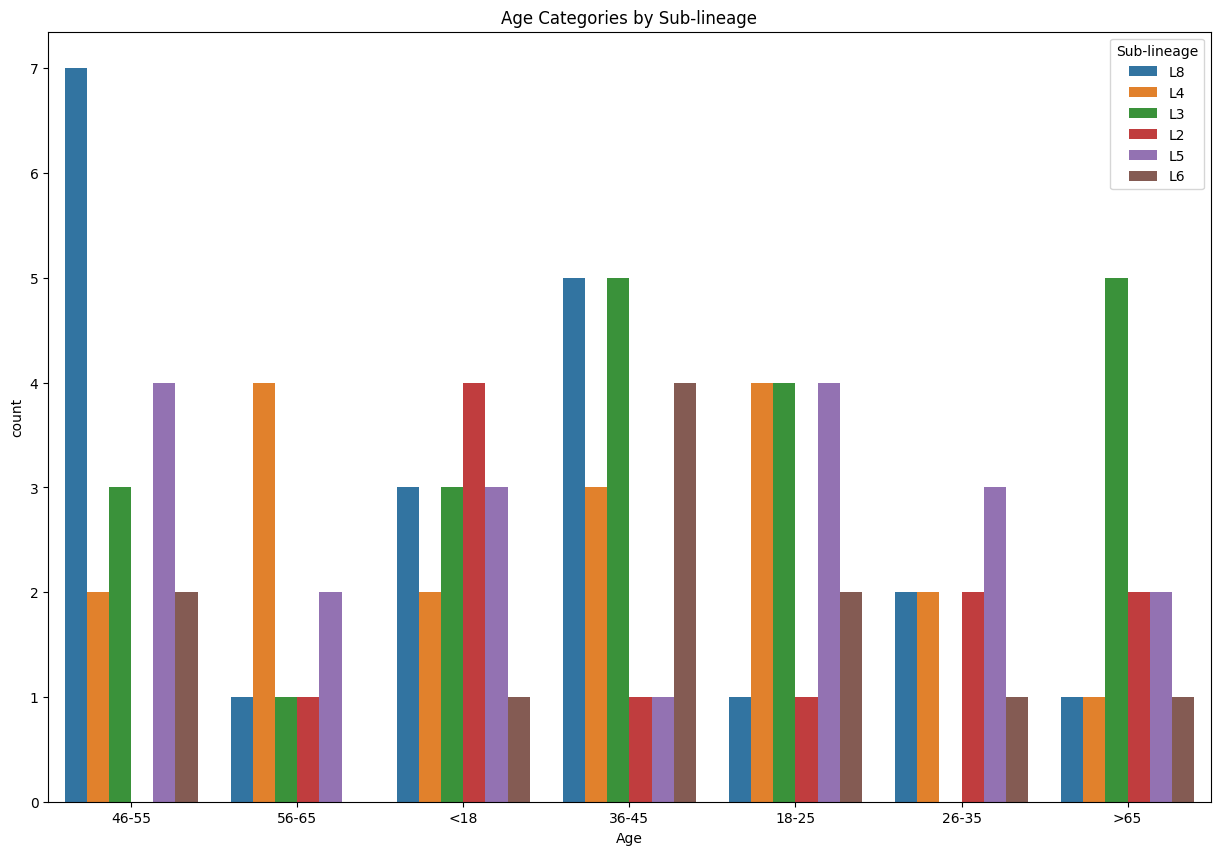

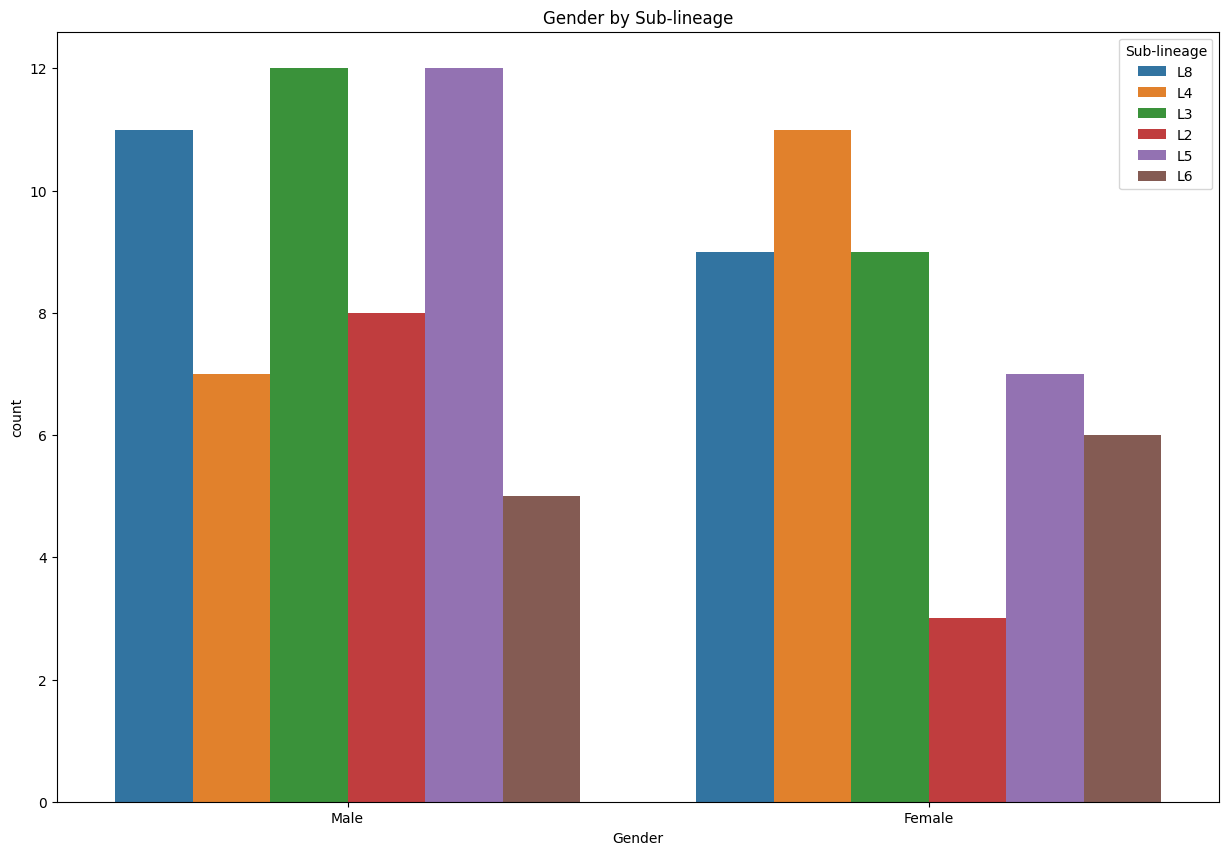

In [14]:
# Visualizations
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Age', hue='Sub-lineage')
plt.title('Age Categories by Sub-lineage')
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Gender', hue='Sub-lineage')
plt.title('Gender by Sub-lineage')
plt.show()


## Step 4: Chi-Square Tests for Association between MTB Lineages and Clinical Symptoms
Perform Chi-Square tests to determine if there is a significant association between MTB lineages and clinical symptoms.

In [15]:
# Chi-Square Tests for clinical symptoms
clinical_symptoms = ['Cough Duration', 'Cough with Blood', 'Fever', 'Weight Loss', 'Night Sweats', 'Swollen Glands', 'Shortness of Breath', 'Chest Pain', 'Fatigue', 'Recurring Chills', 'Loss of Appetite']

for symptom in clinical_symptoms:
    contingency_table = pd.crosstab(df['Sub-lineage'], df[symptom])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square p-value for {symptom} and Sub-lineage: {p}")


Chi-Square p-value for Cough Duration and Sub-lineage: 0.2020445812706825
Chi-Square p-value for Cough with Blood and Sub-lineage: 0.4854312798312075
Chi-Square p-value for Fever and Sub-lineage: 0.4615827934814297
Chi-Square p-value for Weight Loss and Sub-lineage: 0.6956268067768973
Chi-Square p-value for Night Sweats and Sub-lineage: 0.23735593841245228
Chi-Square p-value for Swollen Glands and Sub-lineage: 0.14484287766747653
Chi-Square p-value for Shortness of Breath and Sub-lineage: 0.8822068570702648
Chi-Square p-value for Chest Pain and Sub-lineage: 0.02917019746527359
Chi-Square p-value for Fatigue and Sub-lineage: 0.3840329470646508
Chi-Square p-value for Recurring Chills and Sub-lineage: 0.14093507931651852
Chi-Square p-value for Loss of Appetite and Sub-lineage: 0.6442632298039883


## Step 5: Logistic Regression for Clinical Symptoms
Perform logistic regression to identify which MTB lineages are significantly associated with specific clinical symptoms, controlling for potential confounders.

In [16]:
# Logistic Regression for clinical symptoms
for symptom in clinical_symptoms:
    X = pd.get_dummies(df[['Sub-lineage', 'Age', 'Gender']], drop_first=True)
    # Convert boolean columns to integers
    X = X.astype(int)
    y = df[symptom].apply(lambda x: 1 if x == 'Yes' else 0)
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit()
    print(model.summary())

Optimization terminated successfully.
         Current function value: 0.611558
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Cough Duration   No. Observations:                  100
Model:                          Logit   Df Residuals:                       87
Method:                           MLE   Df Model:                           12
Date:                Fri, 18 Jul 2025   Pseudo R-squ.:                  0.1084
Time:                        02:11:00   Log-Likelihood:                -61.156
converged:                       True   LL-Null:                       -68.593
Covariance Type:            nonrobust   LLR p-value:                    0.2484
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2550      0.905     -0.282      0.778      -2.028       1.518
Sub-lineage_L3   

## Step 6: Logistic Regression for Pulmonary Cavitation
Use logistic regression models to evaluate the influence of MTB lineage on the presence and extent of pulmonary cavitation.

In [17]:
# Logistic Regression for Pulmonary Cavitation
# Assuming 'Pulmonary Cavitation' is a column in the dataset
X = pd.get_dummies(df[['Sub-lineage', 'Age', 'Gender']], drop_first=True)
# Convert boolean columns to integers
X = X.astype(int)
y = df['Pulmonary Cavitation'].apply(lambda x: 1 if x == 'Yes' else 0)
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.603204
         Iterations 5
                            Logit Regression Results                            
Dep. Variable:     Pulmonary Cavitation   No. Observations:                  100
Model:                            Logit   Df Residuals:                       87
Method:                             MLE   Df Model:                           12
Date:                  Fri, 18 Jul 2025   Pseudo R-squ.:                  0.1133
Time:                          02:11:01   Log-Likelihood:                -60.320
converged:                         True   LL-Null:                       -68.029
Covariance Type:              nonrobust   LLR p-value:                    0.2194
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9137      0.910     -1.004      0.315      -2.697       0.870
S

## Step 7: Chi-Square Tests for Treatment Outcomes
Use Chi-Square tests to assess the association between MTB lineages and treatment outcomes.



In [18]:
# Chi-Square Tests for treatment outcomes
contingency_table = pd.crosstab(df['Sub-lineage'], df['Treatment Outcome'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square p-value for Treatment Outcome and Sub-lineage: {p}")


Chi-Square p-value for Treatment Outcome and Sub-lineage: 0.46808391351466805


## Step 8: Descriptive Statistics for Co-morbidities
Calculate the prevalence of key co-morbidities such as HIV infection, diabetes mellitus, and malnutrition.

In [19]:
# Descriptive statistics for co-morbidities
for comorbidity in ['HIV', 'Diabetes Mellitus', 'Malnutrition']:
    print(f"\n{comorbidity} Distribution:\n", df[comorbidity].value_counts())



HIV Distribution:
 HIV
Positive    52
Negative    48
Name: count, dtype: int64

Diabetes Mellitus Distribution:
 Diabetes Mellitus
Negative    60
Positive    40
Name: count, dtype: int64

Malnutrition Distribution:
 Malnutrition
No     51
Yes    49
Name: count, dtype: int64


## Step 9: Chi-Square Tests for Co-morbidities and MTB Lineages
Use Chi-Square tests to explore the association between co-morbidities and circulating MTB lineages

In [20]:
# Chi-Square Tests for co-morbidities
for comorbidity in ['HIV', 'Diabetes Mellitus', 'Malnutrition']:
    contingency_table = pd.crosstab(df['Sub-lineage'], df[comorbidity])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square p-value for {comorbidity} and Sub-lineage: {p}")


Chi-Square p-value for HIV and Sub-lineage: 0.9651918170300694
Chi-Square p-value for Diabetes Mellitus and Sub-lineage: 0.8398537724367867
Chi-Square p-value for Malnutrition and Sub-lineage: 0.7711492787504004


## Step 10: Multivariate Logistic Regression for Co-morbidities and Treatment Outcomes
Use multivariate logistic regression models to evaluate the independent impact of specific co-morbidities on tuberculosis treatment outcomes.

In [23]:
# Multivariate Logistic Regression for co-morbidities and treatment outcomes
X = pd.get_dummies(df[['HIV', 'Diabetes Mellitus', 'Malnutrition', 'Age', 'Gender']], drop_first=True)
y = df['Treatment Outcome'].apply(lambda x: 1 if x == 'Success' else 0)
# Convert boolean columns to integers
X = X.astype(int)
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.476639
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      Treatment Outcome   No. Observations:                  100
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                           10
Date:                Fri, 18 Jul 2025   Pseudo R-squ.:                 0.09540
Time:                        02:15:01   Log-Likelihood:                -47.664
converged:                       True   LL-Null:                       -52.691
Covariance Type:            nonrobust   LLR p-value:                    0.4358
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.3423      1.125     -2.082      0.037      

## Step 11: Subgroup Analysis for <18 Cohort
Perform all the above analyses specifically for the cohort of patients under 18 years old.

In [24]:
# Subgroup analysis for <18 cohort
df_under_18 = df[df['Age'] == '<18']

# Repeat the analyses for this subgroup
for column in ['Gender', 'Religion', 'Ethnicity', 'Marital Status', 'Education', 'Occupation', 'Household Type', 'Residence Classification', 'Country of Birth', 'Nationality']:
    print(f"\n{column} Distribution for <18 cohort:\n", df_under_18[column].value_counts())

for symptom in clinical_symptoms:
    contingency_table = pd.crosstab(df_under_18['Sub-lineage'], df_under_18[symptom])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square p-value for {symptom} and Sub-lineage in <18 cohort: {p}")



Gender Distribution for <18 cohort:
 Gender
Male      9
Female    7
Name: count, dtype: int64

Religion Distribution for <18 cohort:
 Religion
Other           6
Christianity    5
Islam           4
Traditional     1
Name: count, dtype: int64

Ethnicity Distribution for <18 cohort:
 Ethnicity
Ewe            4
Mole-Dagbon    3
Ga-Adangbe     3
Akan           3
Other          3
Name: count, dtype: int64

Marital Status Distribution for <18 cohort:
 Marital Status
Divorced    5
Married     4
Single      4
Widowed     3
Name: count, dtype: int64

Education Distribution for <18 cohort:
 Education
Tertiary     6
Secondary    4
None         3
Primary      3
Name: count, dtype: int64

Occupation Distribution for <18 cohort:
 Occupation
Student       5
Farmer        4
Trader        3
Unemployed    2
Other         2
Name: count, dtype: int64

Household Type Distribution for <18 cohort:
 Household Type
Urban    9
Rural    7
Name: count, dtype: int64

Residence Classification Distribution for <18 c

In [26]:
!jupyter nbconvert --to html /content/dr_seyi.ipynb
!jupyter nbconvert --to pdf /content/dr_seyi.ipynb

# To download the files:
from google.colab import files
files.download('/content/dr_seyi.html')
files.download('/content/dr_seyi.pdf')

[NbConvertApp] WARNING | pattern '/content/dr_seyi.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

FileNotFoundError: Cannot find file: /content/dr_seyi.html